<a href="https://colab.research.google.com/github/MashyBasker/ML-NG/blob/main/ML_NG_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## LINEAR REGRESSION

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(30, 2)


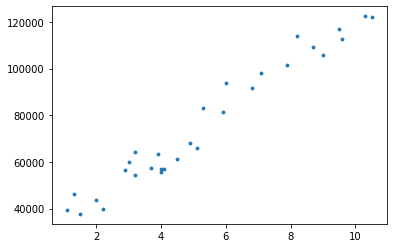

In [ ]:
#read test data
df = pd.read_csv('/content/gdrive/MyDrive/kaggle_datasets/Salary_Data.csv')
#print(df)
N = 50
x_column = df['YearsExperience'].to_list()
y_column = df['Salary'].to_list()
#w , b = -745 , 2
m = len(x_column)
#print(m)
print(df.shape)
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x_column , y_column , s=8)
plt.show()

In [ ]:
def linear(w , b , x):
  return (x * w) + b


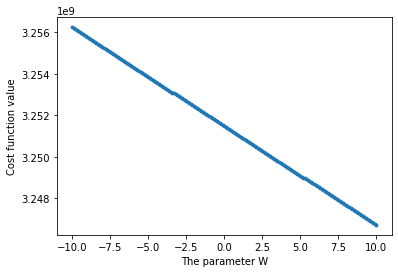

In [ ]:
#show the relationship between the cost-function J(w) and w
cost , w_list = [] , []
def cost_function_plot():
  wval = -10.0
  while wval <= 10.0:
    J = 0
    for i in range(m):
      J += (linear(wval , 0 , x_column[i]) - y_column[i]) ** 2
    w_list.append(wval)
    cost.append(J / (2 * m))
    wval += 0.1
  return w_list , cost

xcol , ycol = cost_function_plot()
plt.xlabel('The parameter W')
plt.ylabel('Cost function value')
plt.scatter(xcol , ycol , s=8)
plt.show()


#The gradient descent algo is used to find the value of w for which J(w,b) is minima  

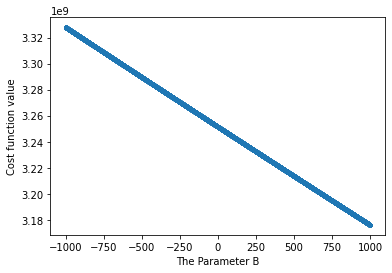

In [ ]:
#relationship between J(b) and parameter b
cost_1 , b_list = [] , []
def cost_function_plot():
  bval = -1000.0
  while bval <= 1000.0:
    J = 0
    for i in range(m):
      J += (linear(0 , bval , x_column[i]) - y_column[i]) ** 2
    b_list.append(bval)
    cost_1.append(J / (2 * m))
    bval += 0.1
  return b_list , cost_1

xcol , ycol = cost_function_plot()
plt.scatter(xcol , ycol , s=8)
plt.xlabel('The Parameter B')
plt.ylabel('Cost function value')
plt.show()

#Similarly here we use grad. descent to find the value of b for which J(w,b) is minima


# PRACTICE LINEAR REGRESSION


In [ ]:
#system modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import opendatasets as od
import os

In [ ]:
#mount google drive to get dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle_datasets'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_datasets

/content/gdrive/MyDrive/kaggle_datasets


In [ ]:
#download data from kaggle using API
!kaggle datasets download -d karthickveerakumar/salary-data-simple-linear-regression

salary-data-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extract after unzipping
!unzip /content/gdrive/MyDrive/kaggle_datasets/salary-data-simple-linear-regression.zip

Archive:  /content/gdrive/MyDrive/kaggle_datasets/salary-data-simple-linear-regression.zip
replace Salary_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary_Data.csv         


In [ ]:
#read CSV file using pandas
data = pd.read_csv('/content/gdrive/MyDrive/kaggle_datasets/Salary_Data.csv')
data

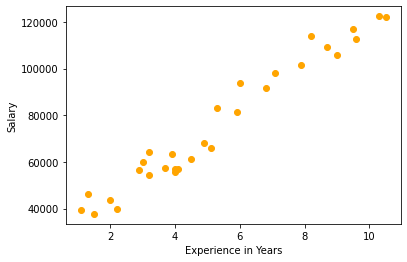

In [ ]:
#visualise the input
x_column = data['YearsExperience'] #x-axis
y_column = data['Salary'] #y-axis
plt.scatter(x_column , y_column , color='orange') #visualise in scatter form
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.show()
m = len(x_column) #batch size
w = 0
b = 0
alpha = 0.01     

In [ ]:
def hypothesis(x):
    #linear hypothesis function
    fx = (w * x) + b
    return fx

# def cost(w , b):
#     #the cost function
#     sum = 0
#     for i in range(m):
#         sum += (hypothesis(x_column[i]) - y_column[i]) ** 2
#     cost_val = sum / (2 * m)
#     return cost_val


In [ ]:
#differentiation funcs
def det_w(w , b):
    #differentiate J(w,b) wrt w
    det_sumw = 0
    for i in range(m):
        det_sumw += (hypothesis(x_column[i]) - y_column[i]) * x_column[i]
    det_val = det_sumw / m
    return det_val

def det_b(w , b):
    #differentiate J(w,b) wrt b
    det_sumb = 0
    for i in range(m):
        det_sumb += (hypothesis(x_column[i]) - y_column[i])
    det_val = det_sumb / m
    return det_val


In [ ]:
#gradient descent in action
def train():
    global w , b
    temp_w = w - alpha * det_w(w , b)
    temp_b = b - alpha * det_b(w , b)
    w = temp_w
    b = temp_b

In [ ]:
#train model for 500 iterations
for _ in range(500):
    train()
print(w , b)

10678.43927859623 17513.820042166673


In [ ]:
#get predictions
predictions = []
for i in range(m) :
    predictions.append(round(hypothesis(x_column[i]) , 1))

#plt.scatter(x_column , predictions)
#plt.show()
print(np.array(y_column) - np.array(predictions))


[10082.9 14809.2  4199.5  4654.3 -1115.4  8160.7 10600.9  2760.2 12760.2
   165.   4058.3 -4433.6 -3270.6 -4214.4 -4455.8 -1900.2 -5944.9  8978.5
   846.4 12355.5  1610.8  4942.3  -571.5  8735.   -985.2 -8037.8 -1990.
 -7391.8 -5110.7 -7765.4]


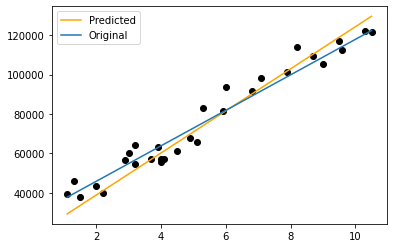

In [ ]:
#compare data
plt.scatter(x_column , y_column , color='black') #original data scatter
plt.plot(x_column , predictions , color='orange' , label='Predicted') #plot of the predicted
plt.plot([min(x_column) , max(x_column)] , [min(y_column) , max(y_column)] , label='Original') #original data plot
plt.legend()
plt.show()